In [2]:
# Pacotes principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use("ggplot")
%matplotlib inline

df_features_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_features_train.csv')
df_labels_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_labels_train.csv')
df_features_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_features_test.csv')
df_submission_format = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dengue/submission_format.csv')

#juntar os parametros com o numero de casos efetivamente

df = df_features_train.merge(df_labels_train, on=["city", "year", "weekofyear"], how="left")


# 1. Mostrar cabeçalho (nomes das colunas)
print("\n🧾 Cabeçalho (colunas):")
print(list(df.columns))

# 2. Tipos de dados por coluna
print("\n🔢 Tipos de dados por coluna:")
print(df.dtypes)

# 3. Contagem de valores ausentes por coluna
print("\n⚠️ Valores ausentes por coluna:")
missing = df.isna().sum()
print(missing[missing > 0] if missing.sum() > 0 else "Nenhum valor ausente encontrado.")

# 4. Visualizar o início da tabela
print("\n🔍 Primeiras linhas da tabela:")
print(df.head())



🧾 Cabeçalho (colunas):
['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm', 'total_cases']

🔢 Tipos de dados por coluna:
city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64

Cidades analisadas no desafio DengAI
San Juan

🇵🇷 Localização: Porto Rico

Latitude: aproximadamente 18.4° N

📍 Hemisfério Norte

Iquitos

🇵🇪 Localização: Peru (região amazônica)

Latitude: aproximadamente 3.7° S

📍 Hemisfério Sul

In [3]:
#separar cidades
sj_df = df[df['city'] == 'sj'].copy()
iq_df = df[df['city'] == 'iq'].copy()

#colunas de data relevantes

import pandas as pd

# Converter a coluna de data
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Criar a coluna do mês
df['month'] = df['week_start_date'].dt.month

# Função auxiliar para mapear estação do ano
def get_season(month):
    if month in [12, 1, 2]:
        return 'Verão'
    elif month in [3, 4, 5]:
        return 'Outono'
    elif month in [6, 7, 8]:
        return 'Inverno'
    elif month in [9, 10, 11]:
        return 'Primavera'

# Aplicar ao DataFrame
df['season'] = df['month'].apply(get_season)

# Ordenar o DataFrame por cidade e data (boas práticas para visualizações temporais)
df = df.sort_values(by=['city', 'week_start_date']).reset_index(drop=True)

# Visualizar os resultados
print(df[['week_start_date', 'month', 'season']].head(10))


  week_start_date  month     season
0      2000-07-01      7    Inverno
1      2000-07-08      7    Inverno
2      2000-07-15      7    Inverno
3      2000-07-22      7    Inverno
4      2000-07-29      7    Inverno
5      2000-08-05      8    Inverno
6      2000-08-12      8    Inverno
7      2000-08-19      8    Inverno
8      2000-08-26      8    Inverno
9      2000-09-02      9  Primavera


In [ ]:
import numpy as np

# Substituir strings ou valores artificiais por NaN (se houver)
df.replace(['', 'NA', -999], np.nan, inplace=True)


In [ ]:
print(df.isna().sum())


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

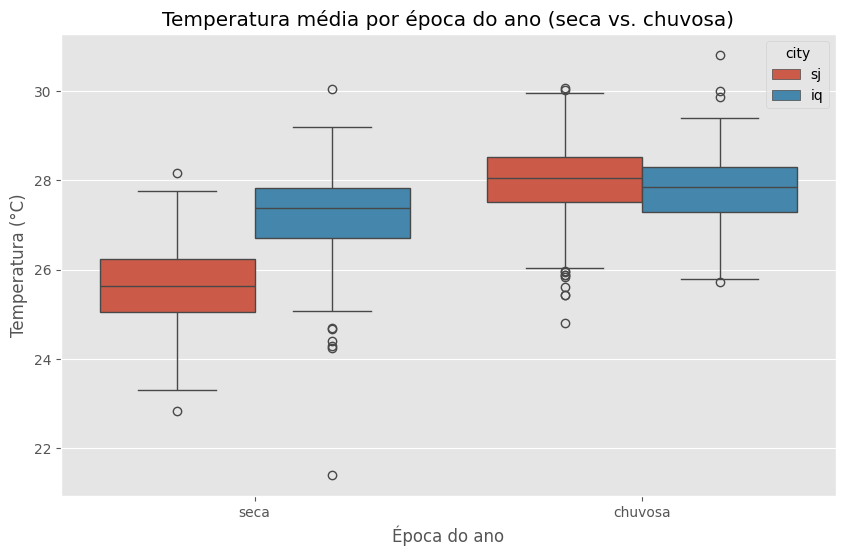

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de que a data está em datetime
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['month'] = df['week_start_date'].dt.month

# Separar por cidade
sj_df = df[df['city'] == 'sj'].copy()
iq_df = df[df['city'] == 'iq'].copy()

# Definir meses de chuva/seca com base na precipitação média mensal
# (definido manualmente com base em observações típicas desses locais)

# San Juan (Porto Rico) — hemisfério norte, tropical:
# estação chuvosa ~ maio a novembro
sj_df['seasonal_period'] = sj_df['month'].apply(lambda m: 'chuvosa' if m in [5,6,7,8,9,10,11] else 'seca')

# Iquitos (Peru) — hemisfério sul, Amazônia:
# estação chuvosa ~ novembro a abril
iq_df['seasonal_period'] = iq_df['month'].apply(lambda m: 'chuvosa' if m in [11,12,1,2,3,4] else 'seca')

# Unir os dois novamente
df_seasonal = pd.concat([sj_df, iq_df])

# Plotar temperatura média por período sazonal para cada cidade
plt.figure(figsize=(10,6))
sns.boxplot(data=df_seasonal, x='seasonal_period', y='station_avg_temp_c', hue='city')
plt.title('Temperatura média por época do ano (seca vs. chuvosa)')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Época do ano')
plt.show()


🌞 San Juan (Hemisfério Norte)
Como você mostrou no gráfico:

A temperatura sobe entre março e agosto (primavera e verão no hemisfério norte)

O pico ocorre em agosto, que é típico de regiões tropicais do hemisfério norte

Inverno (dezembro a fevereiro) mostra valores um pouco mais baixos (~25°C)

🌧️ Iquitos (Hemisfério Sul, Amazônia)
Já Iquitos:

Tem menos variação de temperatura, por estar quase no Equador

Mas apresenta sazonalidade mais clara na precipitação: uma época chuvosa bem marcada de novembro a abril

Isso afeta muito o ambiente para reprodução do mosquito da dengue, mais do que a temperatura em si



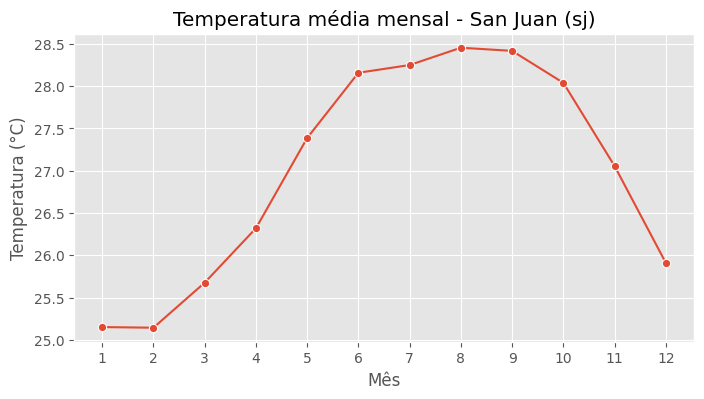

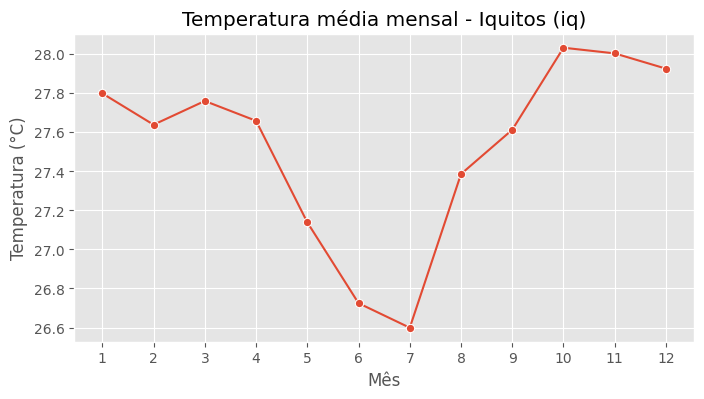

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que a coluna 'month' exista
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['month'] = df['week_start_date'].dt.month

# Calcular temperatura média por mês para cada cidade
monthly_temp = df.groupby(['city', 'month'])['station_avg_temp_c'].mean().reset_index()

# Separar por cidade
sj_temp = monthly_temp[monthly_temp['city'] == 'sj']
iq_temp = monthly_temp[monthly_temp['city'] == 'iq']

# Plot para San Juan
plt.figure(figsize=(8,4))
sns.lineplot(data=sj_temp, x='month', y='station_avg_temp_c', marker='o')
plt.title('Temperatura média mensal - San Juan (sj)')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

# Plot para Iquitos
plt.figure(figsize=(8,4))
sns.lineplot(data=iq_temp, x='month', y='station_avg_temp_c', marker='o')
plt.title('Temperatura média mensal - Iquitos (iq)')
plt.xlabel('Mês')
plt.ylabel('Temperatura (°C)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


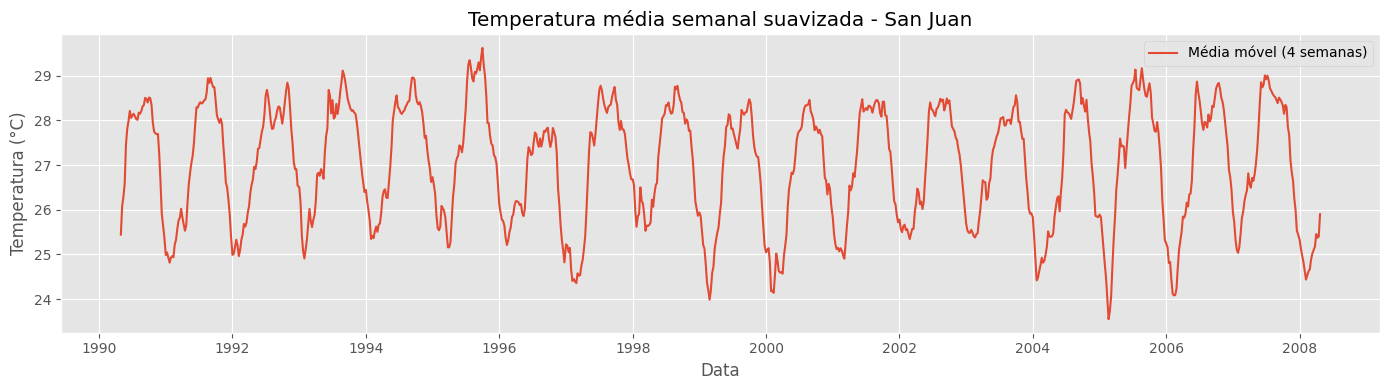

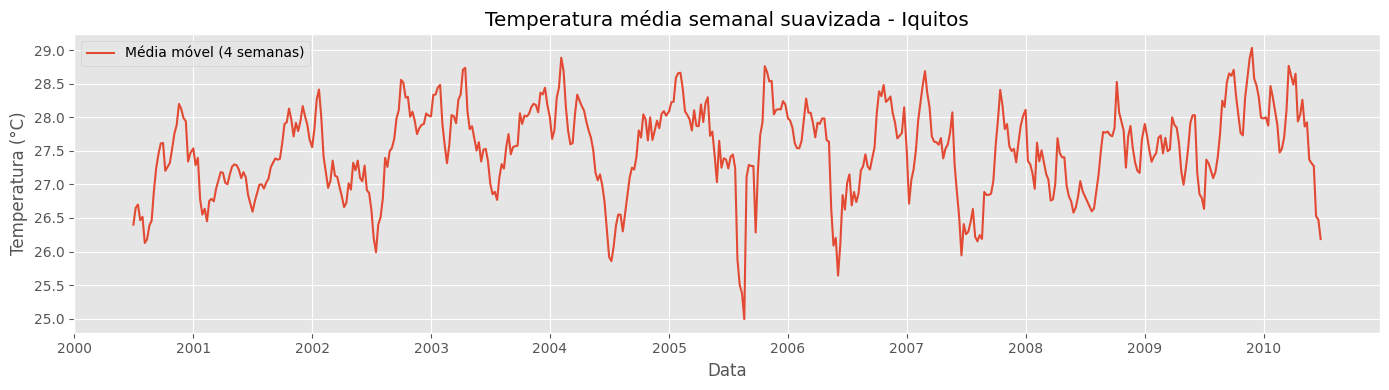

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir colunas corretas
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Ordenar os dados para garantir que a média móvel funcione corretamente
df = df.sort_values(['city', 'week_start_date'])

# Aplicar média móvel com janela de 4 semanas (~1 mês)
df['temp_smoothed'] = df.groupby('city')['station_avg_temp_c'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Filtrar por cidade e plotar
for city_code, city_name in [('sj', 'San Juan'), ('iq', 'Iquitos')]:
    city_df = df[df['city'] == city_code]

    plt.figure(figsize=(14, 4))
    sns.lineplot(data=city_df, x='week_start_date', y='temp_smoothed', label='Média móvel (4 semanas)')
    plt.title(f'Temperatura média semanal suavizada - {city_name}')
    plt.xlabel('Data')
    plt.ylabel('Temperatura (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


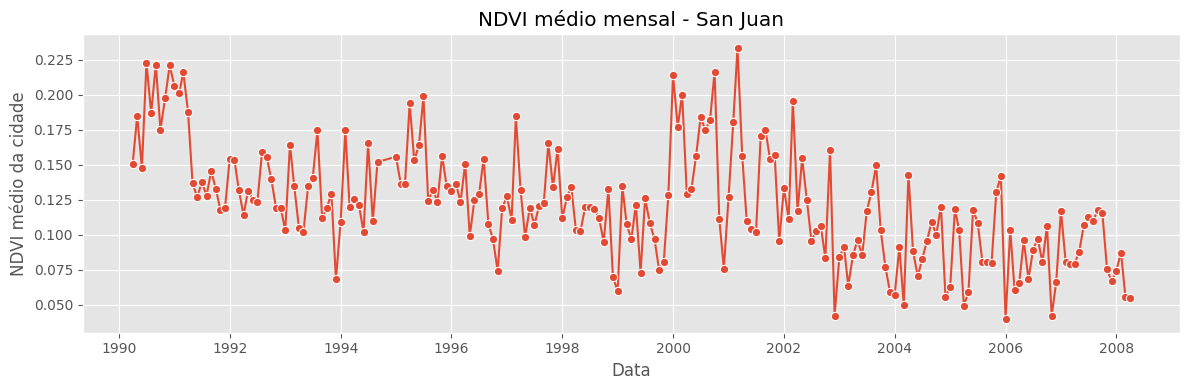

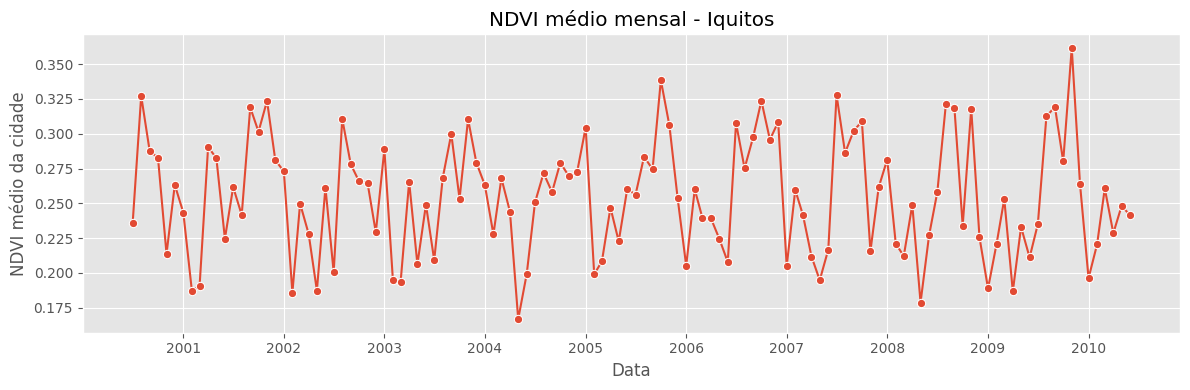

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Garantir datas no formato datetime e extrair o mês
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['month'] = df['week_start_date'].dt.month
df['year'] = df['week_start_date'].dt.year

# 2. Calcular o NDVI médio da cidade por linha (média das 4 direções)
df['ndvi_mean'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

# 3. Agrupar por cidade, ano e mês para obter série temporal mensal
ndvi_monthly = df.groupby(['city', 'year', 'month'])['ndvi_mean'].mean().reset_index()

# 4. Criar coluna de data fictícia para o eixo X (início de cada mês)
ndvi_monthly['date'] = pd.to_datetime(ndvi_monthly[['year', 'month']].assign(day=1))

# 5. Plotar para cada cidade
for city_code, city_name in [('sj', 'San Juan'), ('iq', 'Iquitos')]:
    city_df = ndvi_monthly[ndvi_monthly['city'] == city_code]

    plt.figure(figsize=(12, 4))
    sns.lineplot(data=city_df, x='date', y='ndvi_mean', marker='o')
    plt.title(f'NDVI médio mensal - {city_name}')
    plt.xlabel('Data')
    plt.ylabel('NDVI médio da cidade')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Adicionei uma variavel de dias secos consecutivos

In [ ]:
# Define threshold for dry day (e.g., <1mm precipitation)
dry_threshold = 1.0

# Marcando dias secos
df['dry_day'] = df['precipitation_amt_mm'] < dry_threshold

# Contar dias secos consecutivos por cidade
df['dry_days'] = df.groupby('city')['dry_day'].transform(
    lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1
)

# Adicionar defasagens
for lag in [1, 2, 3]:
    df[f'dry_days_lag{lag}'] = df.groupby('city')['dry_days'].shift(lag)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr_heatmap(df, cols, target='total_cases', city='sj', title=''):
    subset = df[df['city'] == city][cols + [target]].dropna()
    corr = subset.corr(numeric_only=True)
    plt.figure(figsize=(10,6))
    sns.heatmap(corr[[target]].T, annot=True, cmap='coolwarm', center=0)
    plt.title(f'{title} — {city.upper()}')
    plt.show()


In [ ]:
df['ndvi_mean'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)


In [ ]:
# Lista de colunas para aplicar defasagem
cols_to_lag = [
    'ndvi_mean',
    'precipitation_amt_mm',
    'station_precip_mm',
    'station_avg_temp_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_tdtr_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_dew_point_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_sat_precip_amt_mm'
]

# Criar colunas defasadas por cidade
for col in cols_to_lag:
    for lag in [1, 2, 3]:
        df[f'{col}_lag{lag}'] = df.groupby('city')[col].shift(lag)


In [ ]:
# Considera seco se tiver menos de 1mm de precipitação
df['dry_day'] = df['precipitation_amt_mm'] < 1.0

# Conta dias secos consecutivos
df['dry_days'] = df.groupby('city')['dry_day'].transform(
    lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1
)

# Criar defasagens
for lag in [1, 2, 3]:
    df[f'dry_days_lag{lag}'] = df.groupby('city')['dry_days'].shift(lag)


Precipitação

In [ ]:
# Lista de colunas para aplicar defasagem
cols_to_lag = [
    'ndvi_mean',
    'precipitation_amt_mm',
    'station_precip_mm',
    'station_avg_temp_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_tdtr_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_dew_point_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_sat_precip_amt_mm'
]

# Criar colunas defasadas por cidade
for col in cols_to_lag:
    for lag in [1, 2, 3]:
        df[f'{col}_lag{lag}'] = df.groupby('city')[col].shift(lag)


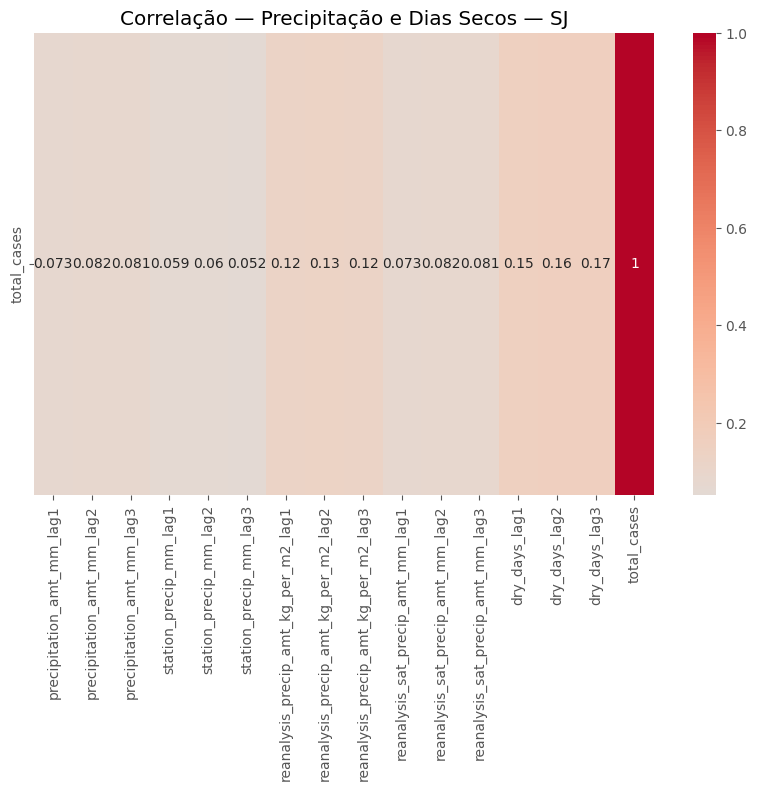

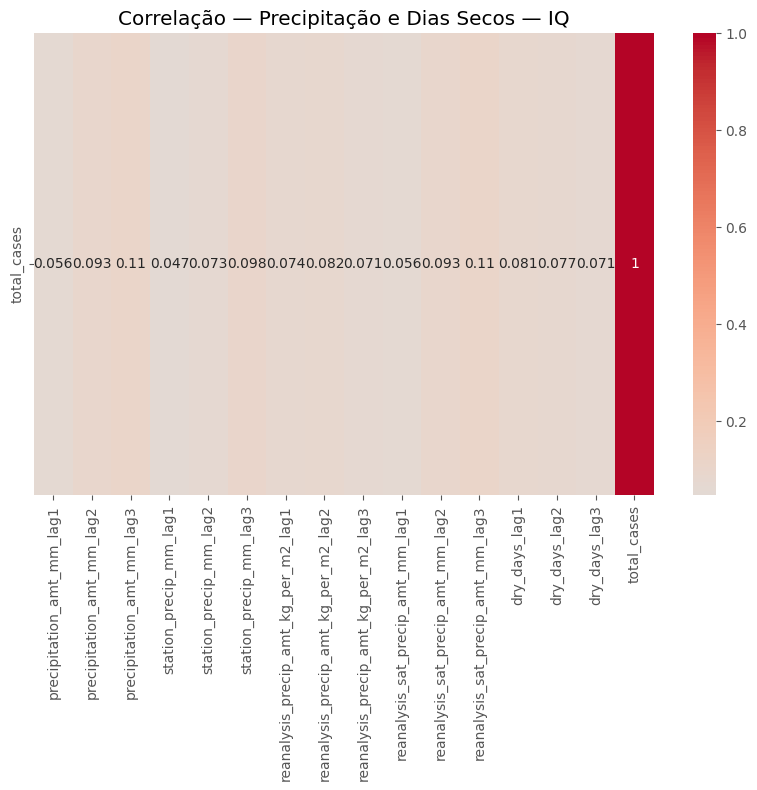

In [ ]:
precip_cols = [
    'precipitation_amt_mm_lag1', 'precipitation_amt_mm_lag2', 'precipitation_amt_mm_lag3',
    'station_precip_mm_lag1', 'station_precip_mm_lag2', 'station_precip_mm_lag3',
    'reanalysis_precip_amt_kg_per_m2_lag1', 'reanalysis_precip_amt_kg_per_m2_lag2', 'reanalysis_precip_amt_kg_per_m2_lag3',
    'reanalysis_sat_precip_amt_mm_lag1', 'reanalysis_sat_precip_amt_mm_lag2', 'reanalysis_sat_precip_amt_mm_lag3',
    'dry_days_lag1', 'dry_days_lag2', 'dry_days_lag3'
]

# Para San Juan
plot_corr_heatmap(df, precip_cols, city='sj', title='Correlação — Precipitação e Dias Secos')

# Para Iquitos
plot_corr_heatmap(df, precip_cols, city='iq', title='Correlação — Precipitação e Dias Secos')


sj - lag2
iq - lag3
para dados de precipitação
dias secos pareceu mais forte no lag3 para sj

NDI

Lag 0 semanas — Cidade: iq → Inclinação (β₁): 0.2977
Lag 0 semanas — Cidade: sj → Inclinação (β₁): 26.5936


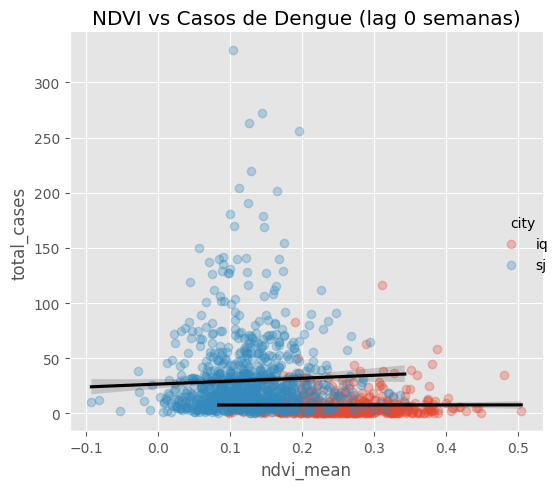

Lag 1 semanas — Cidade: iq → Inclinação (β₁): -6.0322
Lag 1 semanas — Cidade: sj → Inclinação (β₁): 31.5543


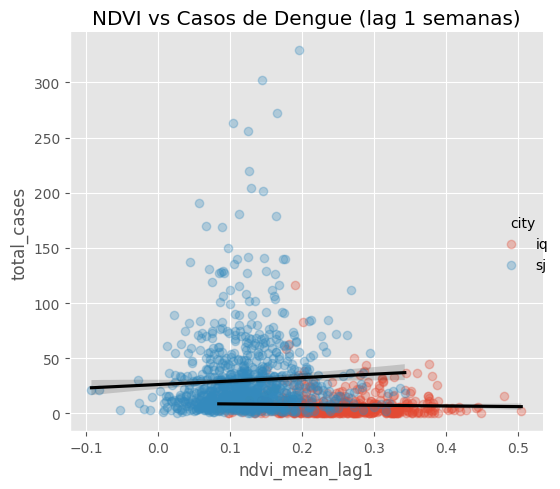

Lag 2 semanas — Cidade: iq → Inclinação (β₁): -6.0040
Lag 2 semanas — Cidade: sj → Inclinação (β₁): 23.4024


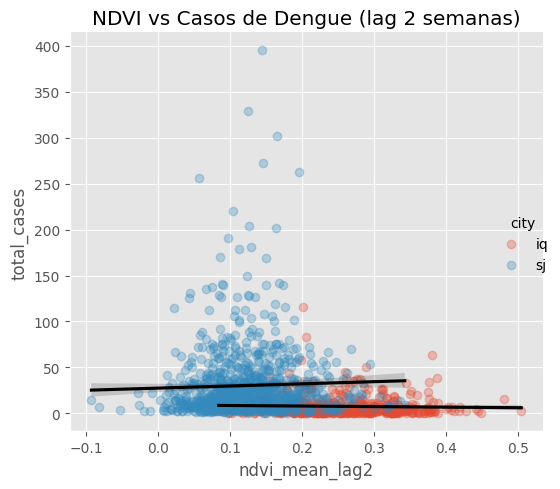

Lag 3 semanas — Cidade: iq → Inclinação (β₁): -3.2122
Lag 3 semanas — Cidade: sj → Inclinação (β₁): 22.5694


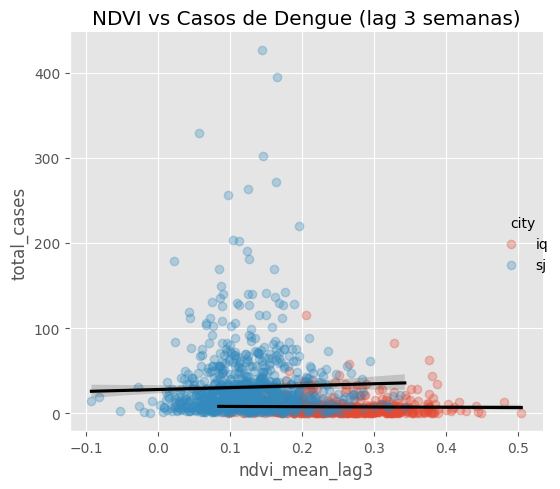

In [ ]:

# Calcular NDVI médio
df['ndvi_mean'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Garantir que os lags estejam criados
for lag in [1, 2, 3]:
    df[f'ndvi_mean_lag{lag}'] = df.groupby('city')['ndvi_mean'].shift(lag)

# Plot com coeficientes
for lag in [0, 1, 2, 3]:
    col = f'ndvi_mean_lag{lag}' if lag > 0 else 'ndvi_mean'

    # Criar gráfico
    sns.lmplot(
        data=df,
        x=col,
        y='total_cases',
        hue='city',
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'black'}
    )

    # Calcular e exibir coeficientes de inclinação
    for city in df['city'].unique():
        sub = df[[col, 'total_cases']][df['city'] == city].dropna()
        if not sub.empty:
            X = sub[[col]].values
            y = sub['total_cases'].values
            model = LinearRegression().fit(X, y)
            coef = model.coef_[0]
            print(f"Lag {lag} semanas — Cidade: {city} → Inclinação (β₁): {coef:.4f}")

    plt.title(f'NDVI vs Casos de Dengue (lag {lag} semanas)')
    plt.tight_layout()
    plt.show()


Parece que o lag de 1 semana é mais significativo para ambas as cidades, porém tem efeito positivo em sj e negativo em iq

In [ ]:
precip_cols = [
    'precipitation_amt_mm_lag1', 'precipitation_amt_mm_lag2', 'precipitation_amt_mm_lag3',
    'station_precip_mm_lag1', 'station_precip_mm_lag2', 'station_precip_mm_lag3',
    'reanalysis_precip_amt_kg_per_m2_lag1', 'reanalysis_precip_amt_kg_per_m2_lag2', 'reanalysis_precip_amt_kg_per_m2_lag3',
    'reanalysis_sat_precip_amt_mm_lag1', 'reanalysis_sat_precip_amt_mm_lag2', 'reanalysis_sat_precip_amt_mm_lag3',
    'dry_days_lag1', 'dry_days_lag2', 'dry_days_lag3'
]


In [ ]:
ndvi_cols = [
    'ndvi_mean_lag1',
    'ndvi_mean_lag2',
    'ndvi_mean_lag3'
]


Umidade

In [ ]:
humidity_cols = [
    'reanalysis_relative_humidity_percent_lag1', 'reanalysis_relative_humidity_percent_lag2', 'reanalysis_relative_humidity_percent_lag3',
    'reanalysis_specific_humidity_g_per_kg_lag1', 'reanalysis_specific_humidity_g_per_kg_lag2', 'reanalysis_specific_humidity_g_per_kg_lag3',
    'reanalysis_dew_point_temp_k_lag1', 'reanalysis_dew_point_temp_k_lag2', 'reanalysis_dew_point_temp_k_lag3'
]


Temperatura

In [ ]:
temp_cols = [
    'station_avg_temp_c_lag1', 'station_avg_temp_c_lag2', 'station_avg_temp_c_lag3',
    'station_max_temp_c_lag1', 'station_max_temp_c_lag2', 'station_max_temp_c_lag3',
    'station_min_temp_c_lag1', 'station_min_temp_c_lag2', 'station_min_temp_c_lag3',
    'reanalysis_air_temp_k_lag1', 'reanalysis_air_temp_k_lag2', 'reanalysis_air_temp_k_lag3',
    'reanalysis_avg_temp_k_lag1', 'reanalysis_avg_temp_k_lag2', 'reanalysis_avg_temp_k_lag3',
    'reanalysis_tdtr_k_lag1', 'reanalysis_tdtr_k_lag2', 'reanalysis_tdtr_k_lag3'
]


In [ ]:
precip_cols = [
    f'{col}_lag{lag}'
    for col in ['precipitation_amt_mm', 'station_precip_mm', 'dry_days']
    for lag in [1,2,3,4,5,6,7,8,9]
]

temp_cols = [
    f'{col}_lag{lag}'
    for col in ['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c',
                'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']
    for lag in  [1,2,3,4,5,6,7,8,9]
]

humidity_cols = [
    f'{col}_lag{lag}'
    for col in ['reanalysis_relative_humidity_percent',
                'reanalysis_specific_humidity_g_per_kg',
                'reanalysis_dew_point_temp_k']
    for lag in  [1,2,3,4,5,6,7,8,9]
]
ndvi_cols = [f'ndvi_mean_lag{lag}' for lag in [1,2,3,4,5,6,7,8,9]]


In [ ]:
# ✅ 1. Criar média de NDVI
df['ndvi_mean'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

# ✅ 2. Criar variável de dias secos consecutivos
dry_threshold = 1.0
df['dry_day'] = df['precipitation_amt_mm'] < dry_threshold
df['dry_days'] = df.groupby('city')['dry_day'].transform(
    lambda x: x.groupby((x != x.shift()).cumsum()).cumcount() + 1
)

# ✅ 3. Lista de colunas para lag
cols_to_lag = [
    'ndvi_mean',
    'precipitation_amt_mm',
    'station_precip_mm',
    'station_avg_temp_c',
    'station_max_temp_c',
    'station_min_temp_c',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k',
    'reanalysis_tdtr_k',
    'reanalysis_relative_humidity_percent',
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_dew_point_temp_k',
    'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_sat_precip_amt_mm',
    'dry_days'
]

# ✅ 4. Criar lags de 1, 2 e 3 semanas por cidade
for col in cols_to_lag:
    for lag in [1,2,3,4,5,6,7,8,9]:
        df[f'{col}_lag{lag}'] = df.groupby('city')[col].shift(lag)
print(df)


     city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      iq  2000          26      2000-07-01  0.192886  0.132257  0.340886   
1      iq  2000          27      2000-07-08  0.216833  0.276100  0.289457   
2      iq  2000          28      2000-07-15  0.176757  0.173129  0.204114   
3      iq  2000          29      2000-07-22  0.227729  0.145429  0.254200   
4      iq  2000          30      2000-07-29  0.328643  0.322129  0.254371   
...   ...   ...         ...             ...       ...       ...       ...   
1451   sj  2008          13      2008-03-25  0.077850 -0.039900  0.310471   
1452   sj  2008          14      2008-04-01 -0.038000 -0.016833  0.119371   
1453   sj  2008          15      2008-04-08 -0.155200 -0.052750  0.137757   
1454   sj  2008          16      2008-04-15  0.001800       NaN  0.203900   
1455   sj  2008          17      2008-04-22 -0.037000 -0.010367  0.077314   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0

/tmp/ipython-input-74-3059111407.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag{lag}'] = df.groupby('city')[col].shift(lag)
/tmp/ipython-input-74-3059111407.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_lag{lag}'] = df.groupby('city')[col].shift(lag)
/tmp/ipython-input-74-3059111407.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

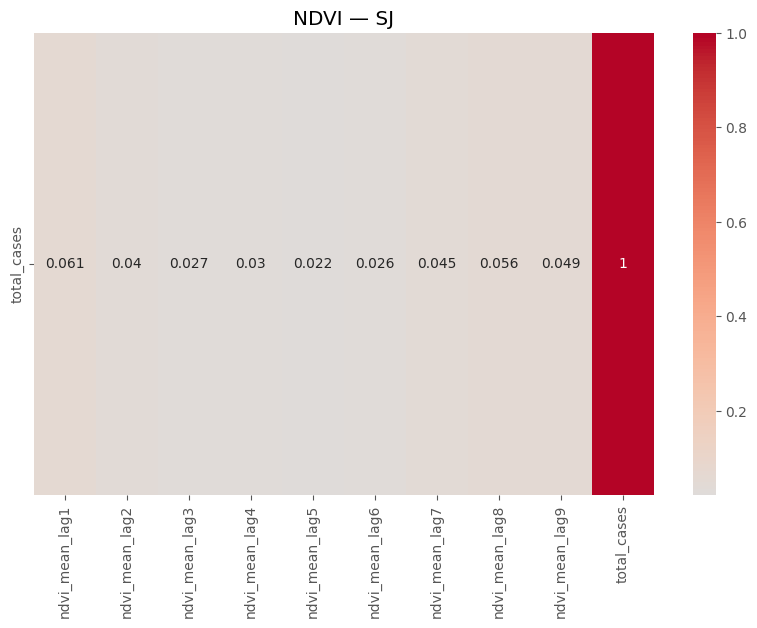

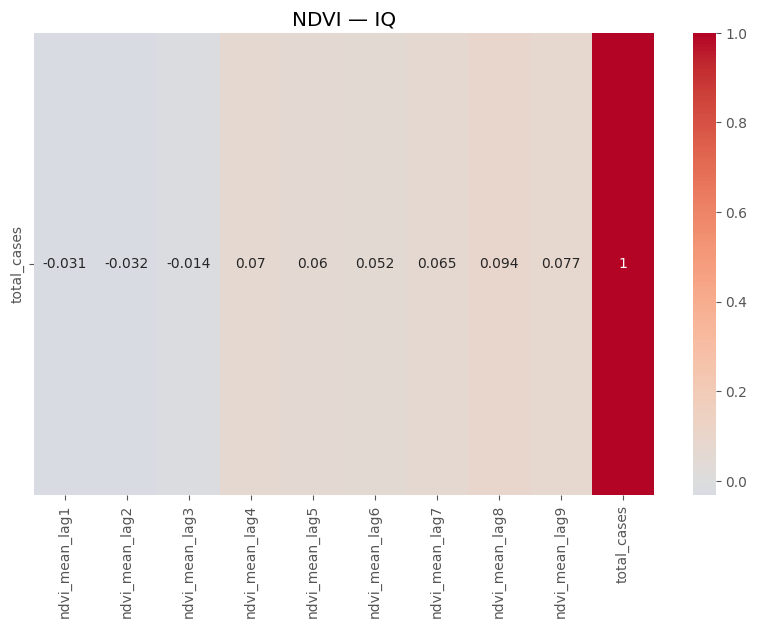

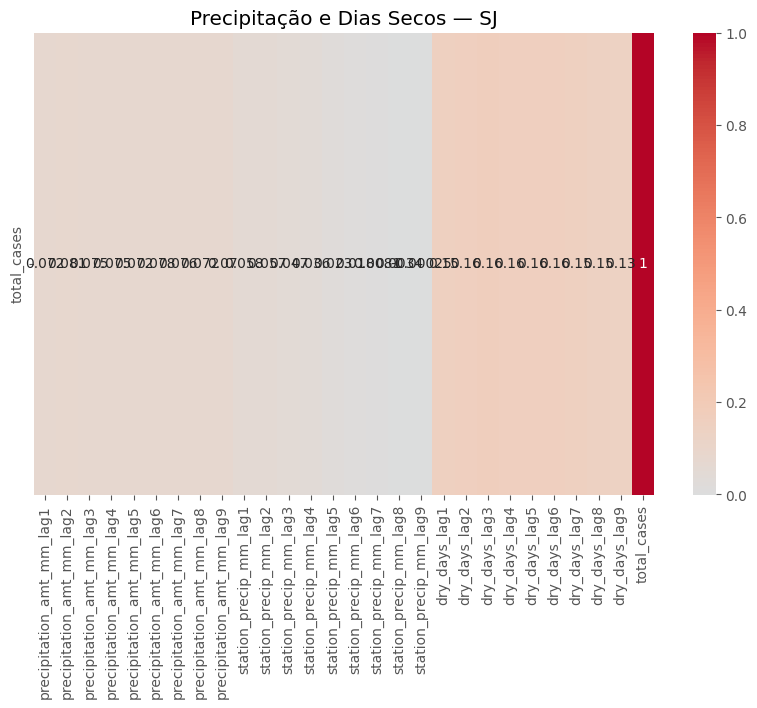

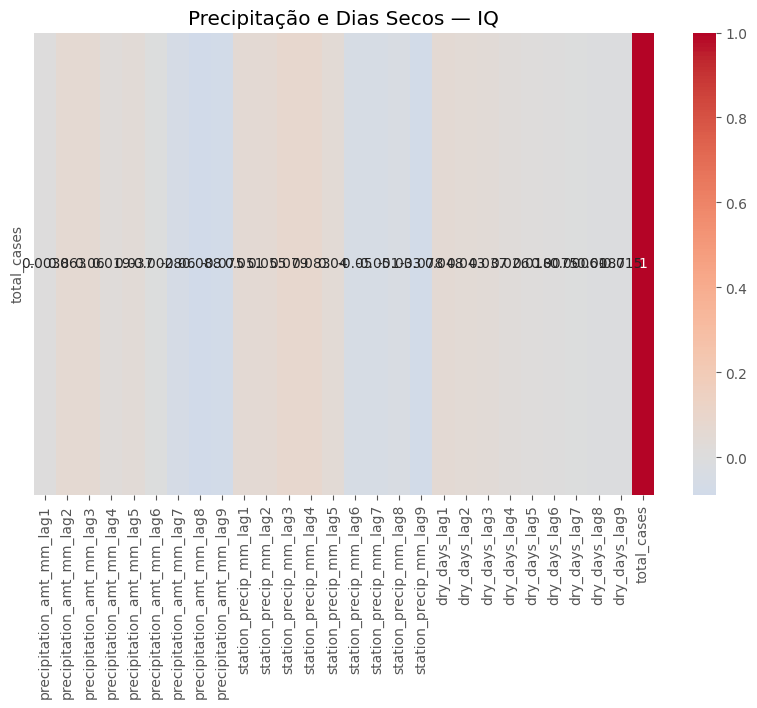

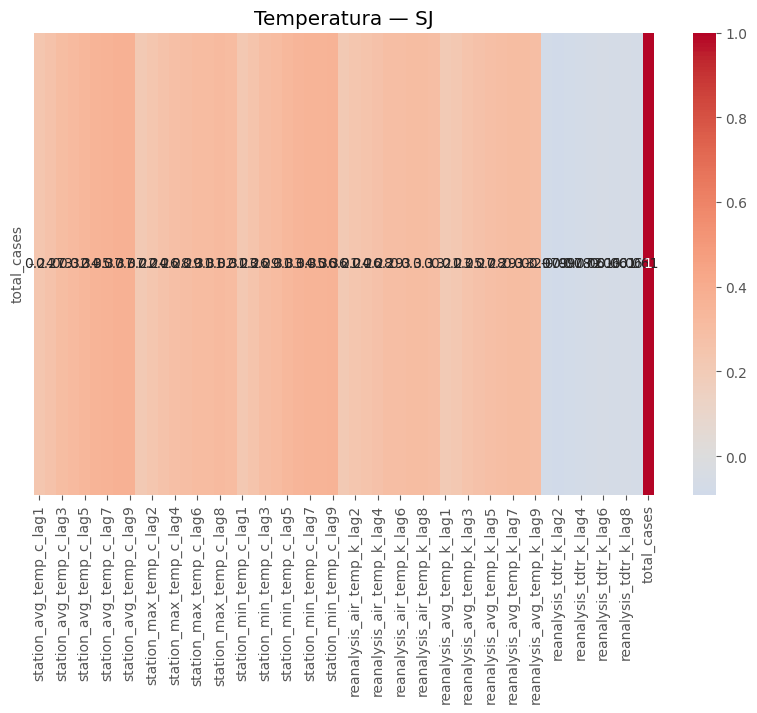

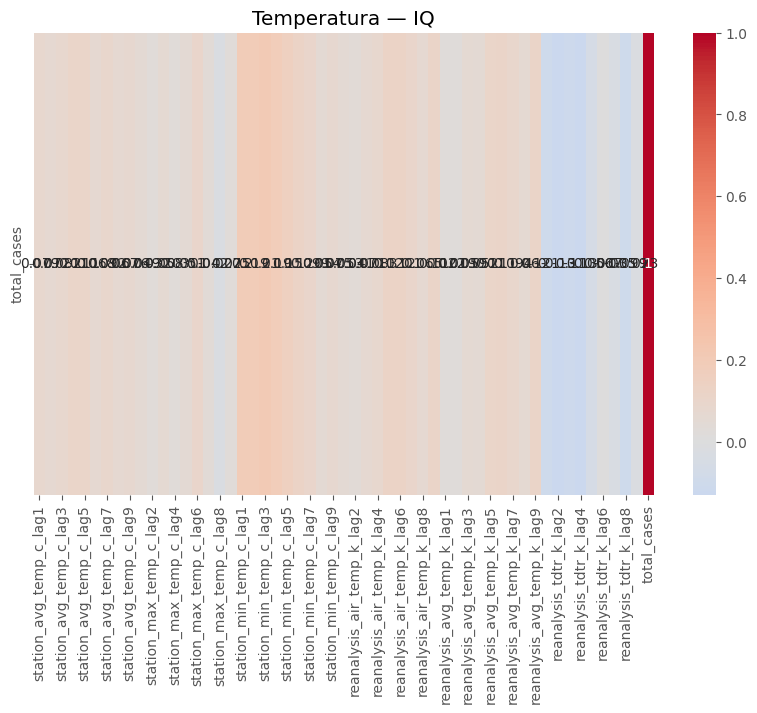

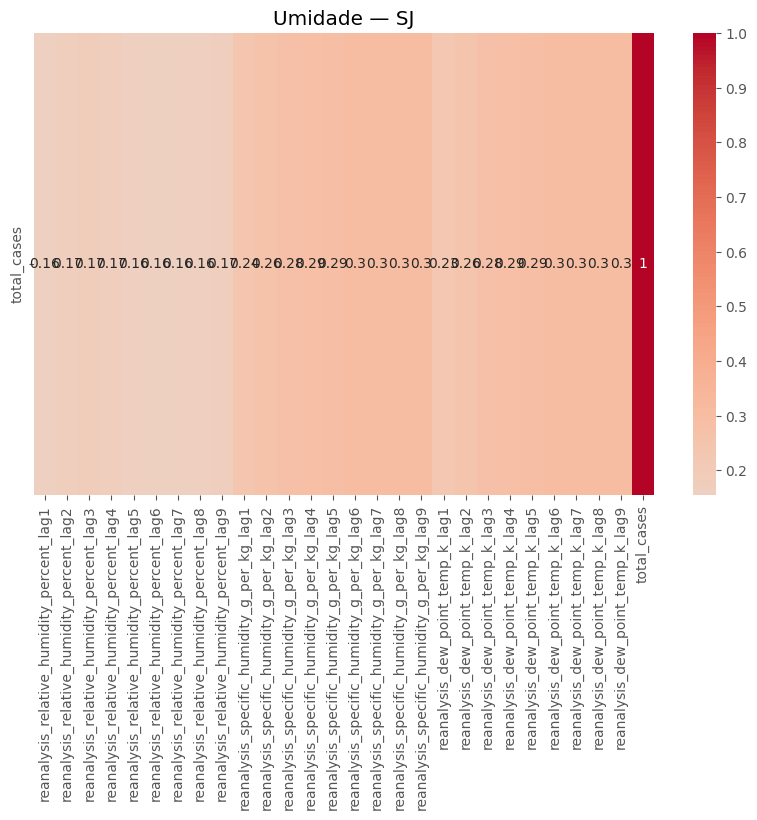

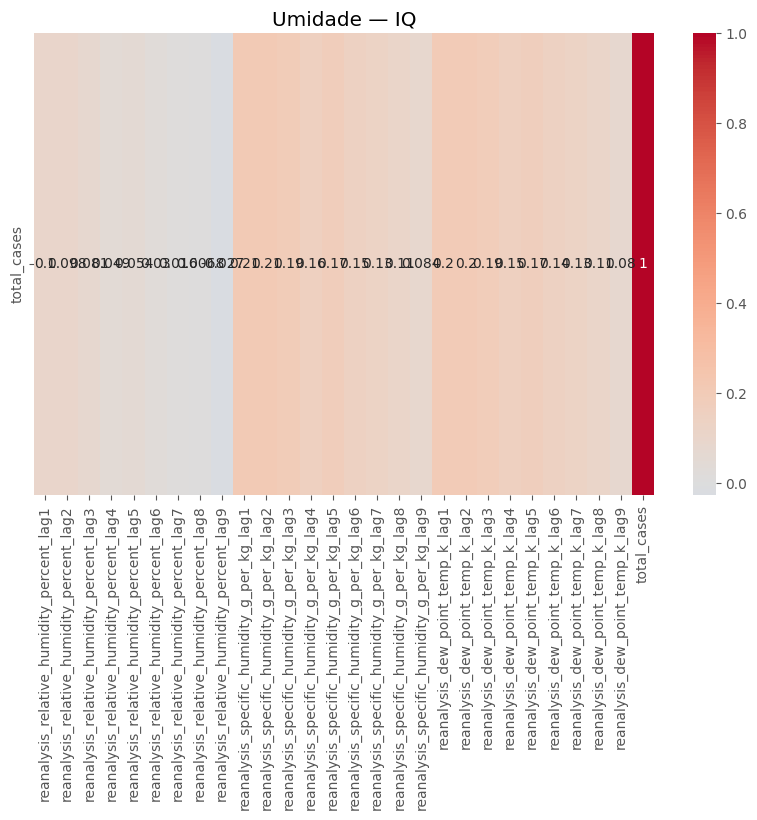

In [ ]:
# NDVI
plot_corr_heatmap(df, ndvi_cols, city='sj', title='NDVI')
plot_corr_heatmap(df, ndvi_cols, city='iq', title='NDVI')

# Precipitação
plot_corr_heatmap(df, precip_cols, city='sj', title='Precipitação e Dias Secos')
plot_corr_heatmap(df, precip_cols, city='iq', title='Precipitação e Dias Secos')

# Temperatura
plot_corr_heatmap(df, temp_cols, city='sj', title='Temperatura')
plot_corr_heatmap(df, temp_cols, city='iq', title='Temperatura')

# Umidade
plot_corr_heatmap(df, humidity_cols, city='sj', title='Umidade')
plot_corr_heatmap(df, humidity_cols, city='iq', title='Umidade')



In [ ]:
lags = [1, 2, 3, 4, 5, 6]
variaveis_relevantes = [
    'station_avg_temp_c',
    'reanalysis_dew_point_temp_k',
    'reanalysis_specific_humidity_g_per_kg',
    'precipitation_amt_mm',
    'station_precip_mm',
    'ndvi_mean'
]

# Filtrar apenas San Juan
df_sj = df[df['city'] == 'sj'].copy()

# Criar um dicionário para armazenar os lags
lagged_features = {}

for var in variaveis_relevantes:
    for lag in lags:
        col_name = f'{var}_lag{lag}'
        lagged_features[col_name] = df_sj[var].shift(lag)

# Concatenar tudo de uma vez
df_sj_lags = pd.concat([df_sj] + [pd.Series(v, name=k) for k, v in lagged_features.items()], axis=1)






In [ ]:
# Eliminar NaNs resultantes do shift
df_sj_lags = df_sj_lags.dropna(subset=list(lagged_features.keys()) + ['total_cases']).copy()
df_sj = df_sj.dropna(subset=[f'{var}_lag{lag}' for var in variaveis_relevantes for lag in lags] + ['total_cases'])
X_sj = df_sj[[col for col in df_sj.columns if 'lag' in col]]
y_sj = df_sj['total_cases']

from sklearn.model_selection import train_test_split
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj, y_sj, shuffle=False, test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_sj, y_train_sj)

pred = model.predict(X_test_sj)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_sj, pred)
rmse = np.sqrt(mean_squared_error(y_test_sj, pred))
media_real = np.mean(y_test_sj)

print(f"\n📊 SAN JUAN com novos lags")
print(f"MAE: {mae:.2f} (normalizado: {mae/media_real:.3f})")
print(f"RMSE: {rmse:.2f} (normalizado: {rmse/media_real:.3f})")


📊 SAN JUAN com novos lags
MAE: 22.56 (normalizado: 0.875)
RMSE: 31.21 (normalizado: 1.210)


| Cidade | Grupo        | Variáveis recomendadas                                                             |
| ------ | ------------ | ---------------------------------------------------------------------------------- |
| **sj** | Temperatura  | `station_avg_temp_c_lag2`, `station_min_temp_c_lag2`, `station_max_temp_c_lag2`    |
|        | Umidade      | `reanalysis_specific_humidity_g_per_kg_lag3`, `reanalysis_dew_point_temp_k_lag3`   |
|        | Precipitação | `dry_days_lag3` (fraca, mas pode complementar)                                     |
| **iq** | Temperatura  | `station_min_temp_c_lag2`, `station_avg_temp_c_lag1`, `reanalysis_air_temp_k_lag1` |
|        | Umidade      | `reanalysis_specific_humidity_g_per_kg_lag1` e `lag2`                              |
|        | Precipitação | `station_precip_mm_lag2`, `reanalysis_precip_amt_kg_per_m2_lag2`                   |



In [ ]:
# Variáveis escolhidas para San Juan
sj_vars = [
    'station_avg_temp_c_lag2', 'station_max_temp_c_lag2', 'station_min_temp_c_lag2',
    'reanalysis_specific_humidity_g_per_kg_lag3', 'reanalysis_dew_point_temp_k_lag3',
    'dry_days_lag3', 'total_cases'
]

# Variáveis escolhidas para Iquitos
iq_vars = [
    'station_avg_temp_c_lag1', 'station_min_temp_c_lag2', 'reanalysis_air_temp_k_lag1',
    'reanalysis_specific_humidity_g_per_kg_lag1', 'reanalysis_specific_humidity_g_per_kg_lag2',
    'station_precip_mm_lag2', 'reanalysis_precip_amt_kg_per_m2_lag2', 'total_cases'
]

# Separar por cidade e remover linhas com NaN
df_sj = df[df['city'] == 'sj'][sj_vars].dropna().copy()
df_iq = df[df['city'] == 'iq'][iq_vars].dropna().copy()

# Dividir treino/teste com validação temporal
def split_time(df_cidade):
    n = len(df_cidade)
    split_idx = int(n * 0.8)
    train = df_cidade.iloc[:split_idx].copy()
    test = df_cidade.iloc[split_idx:].copy()
    return train, test

sj_train, sj_test = split_time(df_sj)
iq_train, iq_test = split_time(df_iq)

# Separar X e y
X_train_sj, y_train_sj = sj_train.drop(columns='total_cases'), sj_train['total_cases']
X_test_sj, y_test_sj = sj_test.drop(columns='total_cases'), sj_test['total_cases']

X_train_iq, y_train_iq = iq_train.drop(columns='total_cases'), iq_train['total_cases']
X_test_iq, y_test_iq = iq_test.drop(columns='total_cases'), iq_test['total_cases']


Modelo

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Criar os modelos
rf_sj = RandomForestRegressor(n_estimators=100, random_state=42)
rf_iq = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar
rf_sj.fit(X_train_sj, y_train_sj)
rf_iq.fit(X_train_iq, y_train_iq)

# Prever
pred_sj = rf_sj.predict(X_test_sj)
pred_iq = rf_iq.predict(X_test_iq)

# Avaliar com métricas normalizadas
def print_metrics(y_true, y_pred, cidade):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    media_real = np.mean(y_true)

    mae_norm = mae / media_real
    rmse_norm = rmse / media_real

    print(f"\n📊 {cidade.upper()}")
    print(f"MAE: {mae:.2f} (normalizado: {mae_norm:.3f})")
    print(f"RMSE: {rmse:.2f} (normalizado: {rmse_norm:.3f})")

# Imprimir resultados
print_metrics(y_test_sj, pred_sj, 'San Juan')
print_metrics(y_test_iq, pred_iq, 'Iquitos')



📊 SAN JUAN
MAE: 26.72 (normalizado: 1.074)
RMSE: 35.86 (normalizado: 1.441)

📊 IQUITOS
MAE: 9.42 (normalizado: 1.004)
RMSE: 13.68 (normalizado: 1.458)


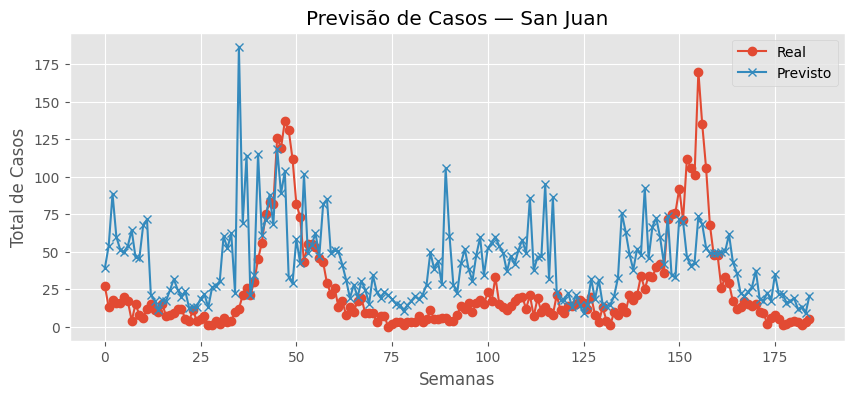

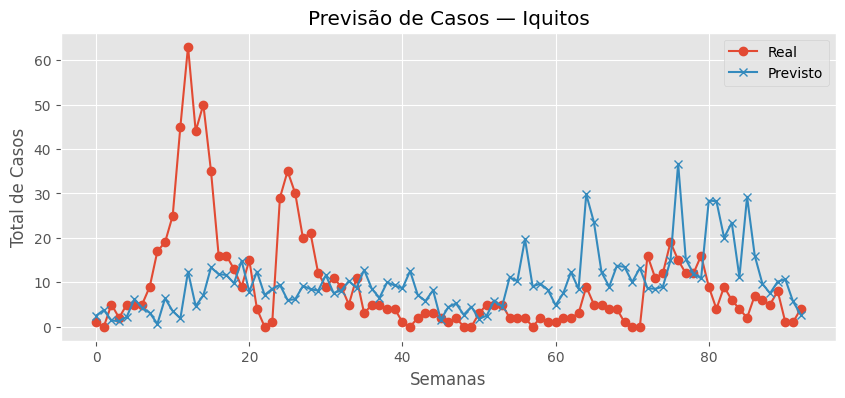

In [ ]:
import matplotlib.pyplot as plt

# San Juan
plt.figure(figsize=(10,4))
plt.plot(y_test_sj.values, label='Real', marker='o')
plt.plot(pred_sj, label='Previsto', marker='x')
plt.title('Previsão de Casos — San Juan')
plt.xlabel('Semanas')
plt.ylabel('Total de Casos')
plt.legend()
plt.grid(True)
plt.show()

# Iquitos
plt.figure(figsize=(10,4))
plt.plot(y_test_iq.values, label='Real', marker='o')
plt.plot(pred_iq, label='Previsto', marker='x')
plt.title('Previsão de Casos — Iquitos')
plt.xlabel('Semanas')
plt.ylabel('Total de Casos')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'station_avg_temp_c_lag1'

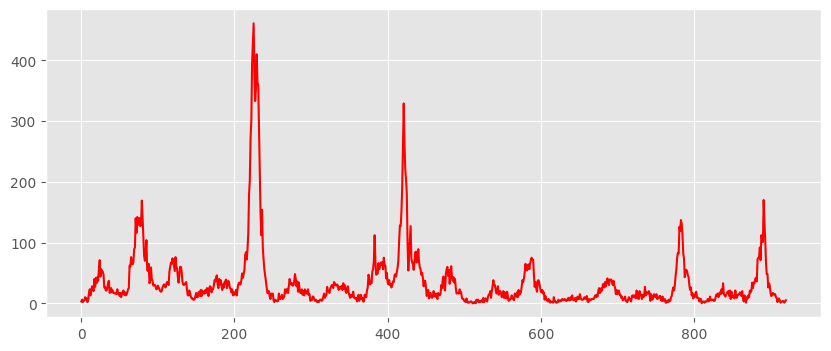

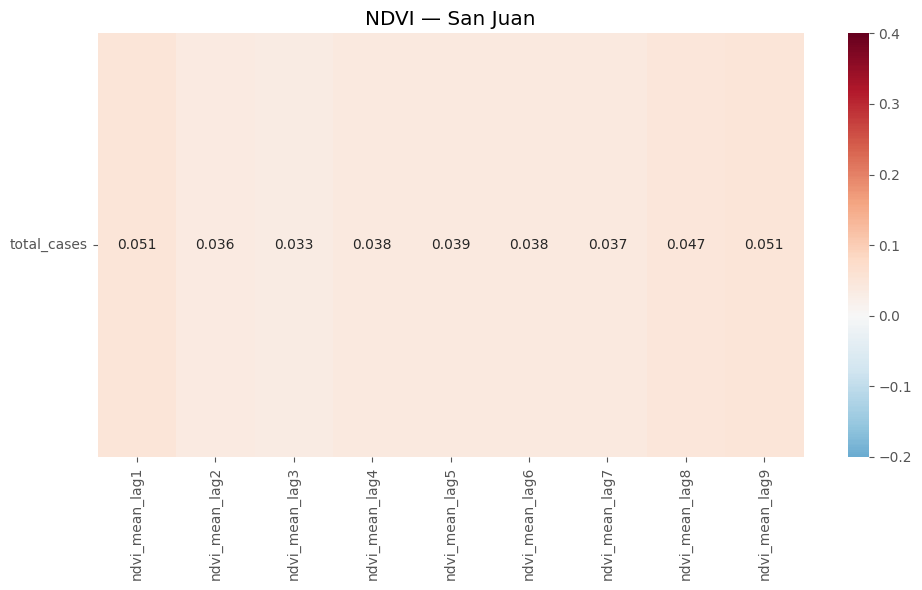

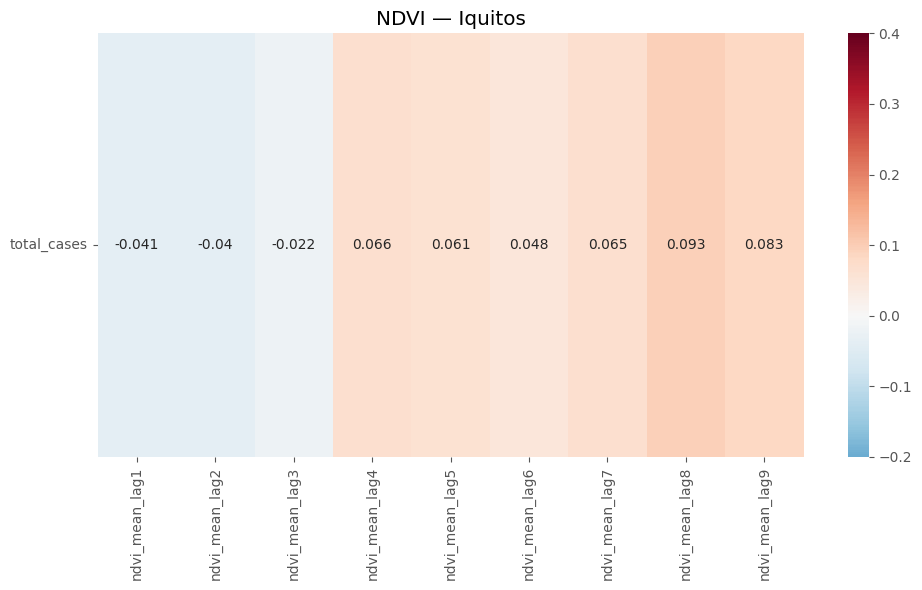

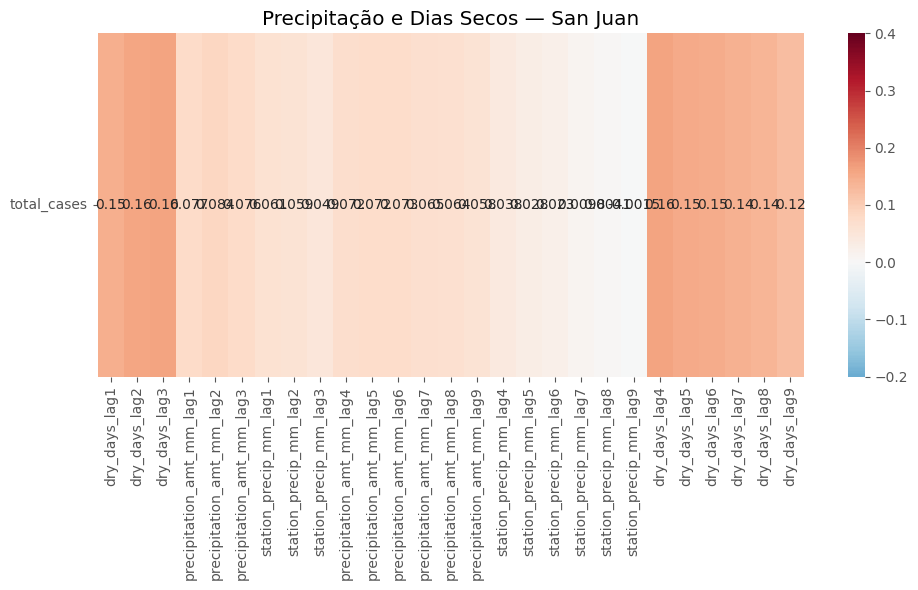

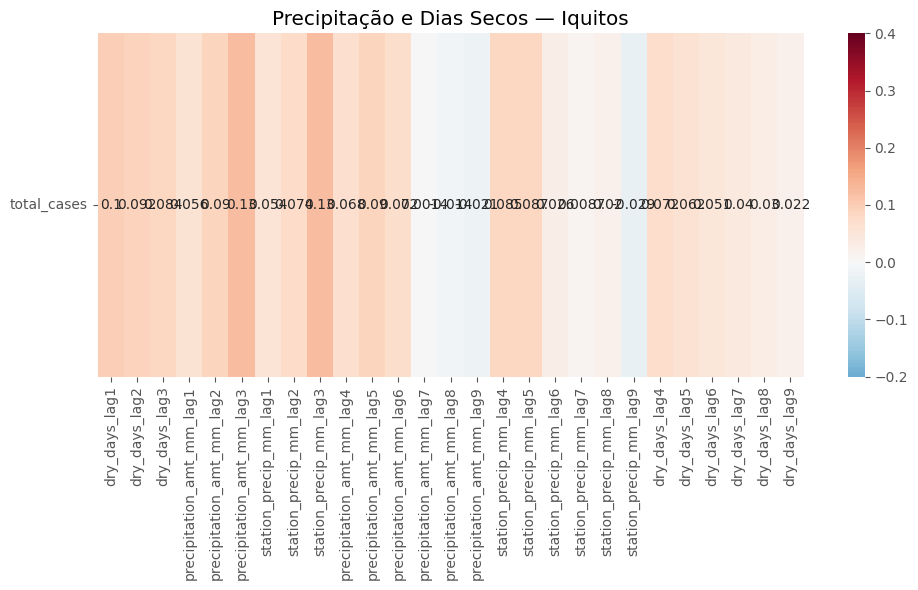

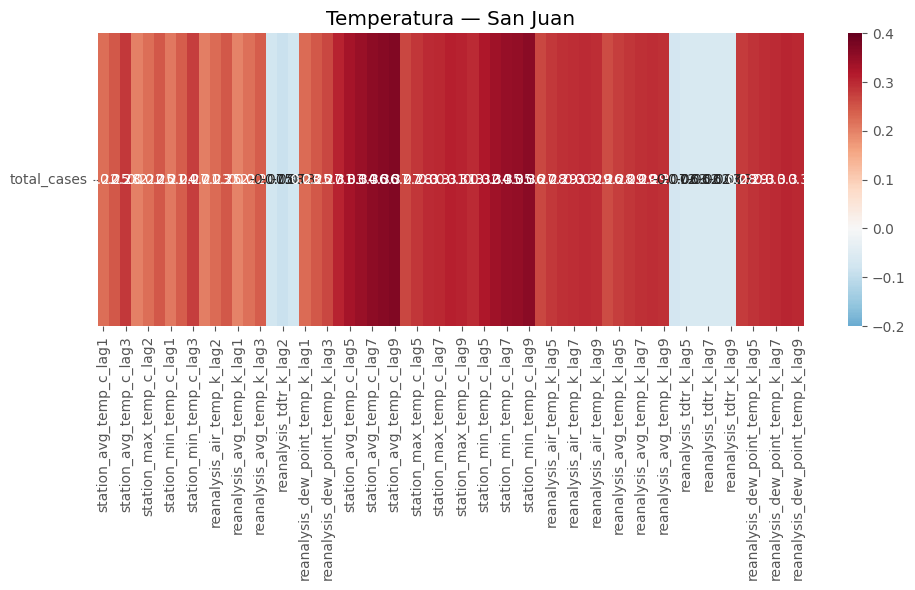

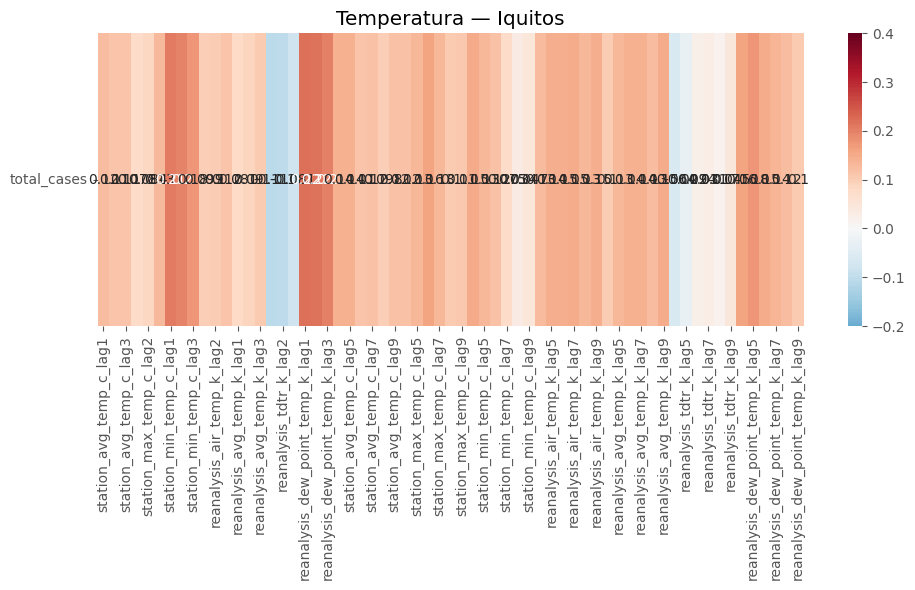

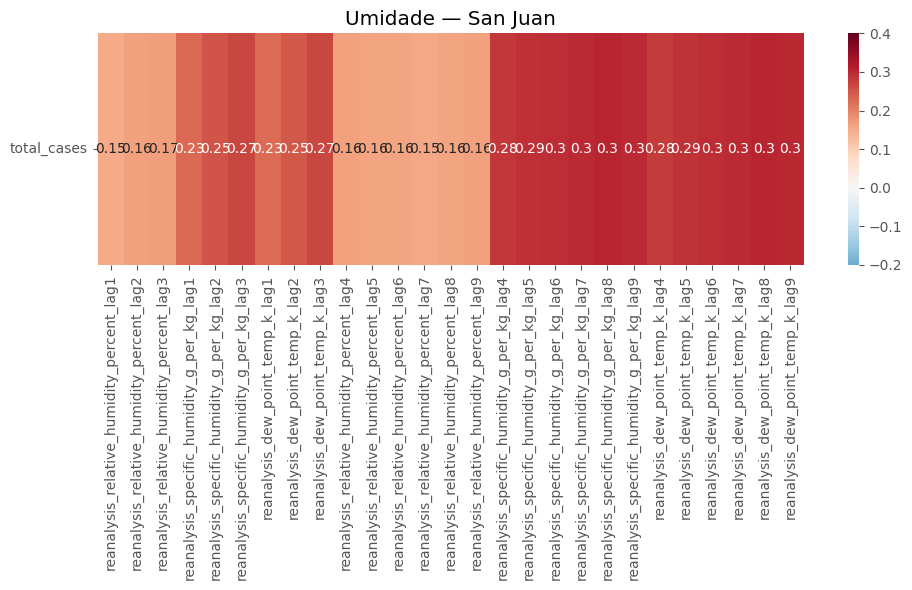

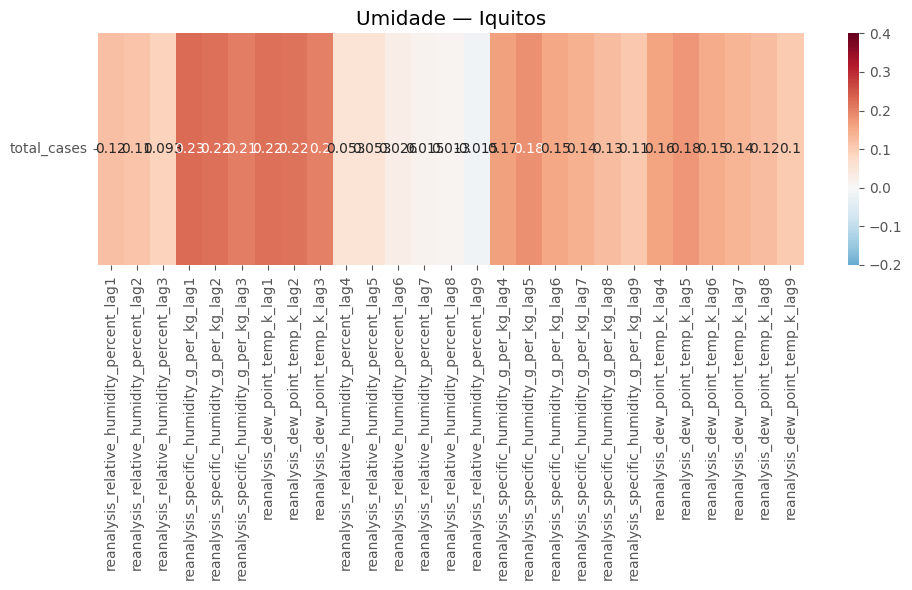

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Grupos de variáveis com lags
ndvi_cols = [col for col in df.columns if 'ndvi_mean_lag' in col]
precip_cols = [col for col in df.columns if any(p in col for p in ['precipitation_amt_mm_lag', 'station_precip_mm_lag', 'dry_days_lag'])]
temp_cols = [col for col in df.columns if any(p in col for p in ['temp_c_lag', 'temp_k_lag', 'tdtr_k_lag'])]
humidity_cols = [col for col in df.columns if any(p in col for p in ['humidity', 'dew_point']) and '_lag' in col]

def plot_corr_heatmap(df, cols, city, title):
    df_city = df[df['city'] == city].copy()
    corr = df_city[cols + ['total_cases']].corr().loc[['total_cases'], cols]

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0, vmin=-0.2, vmax=0.4)
    plt.title(f'{title} — {"San Juan" if city=="sj" else "Iquitos"}')
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
# NDVI
plot_corr_heatmap(df, ndvi_cols, city='sj', title='NDVI')
plot_corr_heatmap(df, ndvi_cols, city='iq', title='NDVI')

# Precipitação e Dias Secos
plot_corr_heatmap(df, precip_cols, city='sj', title='Precipitação e Dias Secos')
plot_corr_heatmap(df, precip_cols, city='iq', title='Precipitação e Dias Secos')

# Temperatura
plot_corr_heatmap(df, temp_cols, city='sj', title='Temperatura')
plot_corr_heatmap(df, temp_cols, city='iq', title='Temperatura')

# Umidade
plot_corr_heatmap(df, humidity_cols, city='sj', title='Umidade')
plot_corr_heatmap(df, humidity_cols, city='iq', title='Umidade')


In [ ]:
# Lags e variáveis mais relevantes por cidade, com base na correlação
features_sj = [
    'reanalysis_dew_point_temp_k_lag6',
    'reanalysis_specific_humidity_g_per_kg_lag6',
    'station_avg_temp_c_lag6',
    'station_precip_mm_lag5',
    'precipitation_amt_mm_lag5',
    'dry_days_lag5',
]

features_iq = [
    'reanalysis_specific_humidity_g_per_kg_lag4',
    'reanalysis_dew_point_temp_k_lag4',
    'station_precip_mm_lag4',
    'precipitation_amt_mm_lag4',
    'dry_days_lag4',
]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset com lags

# Separar por cidade
df_sj = df[df['city'] == 'sj'].dropna(subset=features_sj + ['total_cases']).copy()
df_iq = df[df['city'] == 'iq'].dropna(subset=features_iq + ['total_cases']).copy()

# Função para treinar e avaliar o modelo
def train_and_evaluate(df, features, cidade):
    # Separar treino e teste (80% treino, 20% teste)
    split_index = int(len(df) * 0.8)
    X_train = df[features].iloc[:split_index]
    y_train = df['total_cases'].iloc[:split_index]
    X_test = df[features].iloc[split_index:]
    y_test = df['total_cases'].iloc[split_index:]

    # Modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_norm = mae / y_test.mean()
    rmse_norm = rmse / y_test.mean()

    print(f"\n📊 {cidade.upper()}")
    print(f"MAE: {mae:.2f} (normalizado: {mae_norm:.3f})")
    print(f"RMSE: {rmse:.2f} (normalizado: {rmse_norm:.3f})")

    return y_test.reset_index(drop=True), pd.Series(y_pred)

# Aplicar
y_test_sj, y_pred_sj = train_and_evaluate(df_sj, features_sj, 'San Juan')
y_test_iq, y_pred_iq = train_and_evaluate(df_iq, features_iq, 'Iquitos')



📊 SAN JUAN
MAE: 24.15 (normalizado: 0.967)
RMSE: 31.91 (normalizado: 1.278)

📊 IQUITOS
MAE: 8.56 (normalizado: 0.926)
RMSE: 13.67 (normalizado: 1.480)


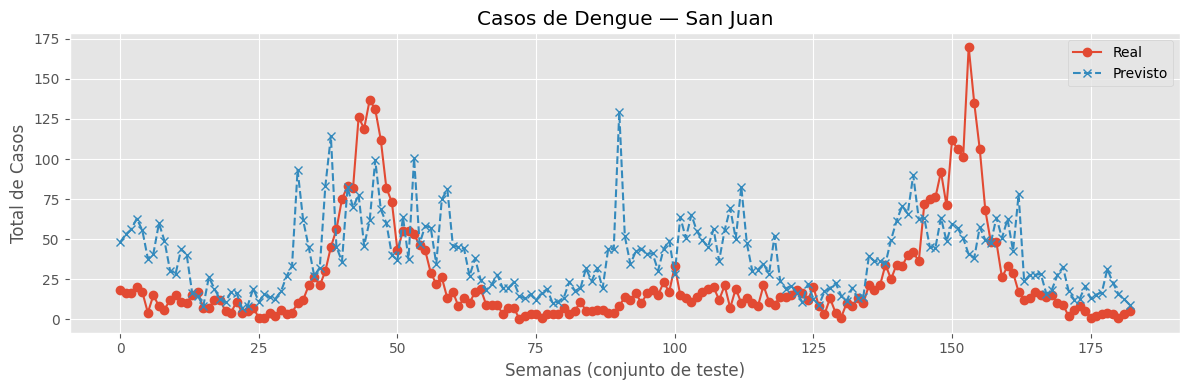

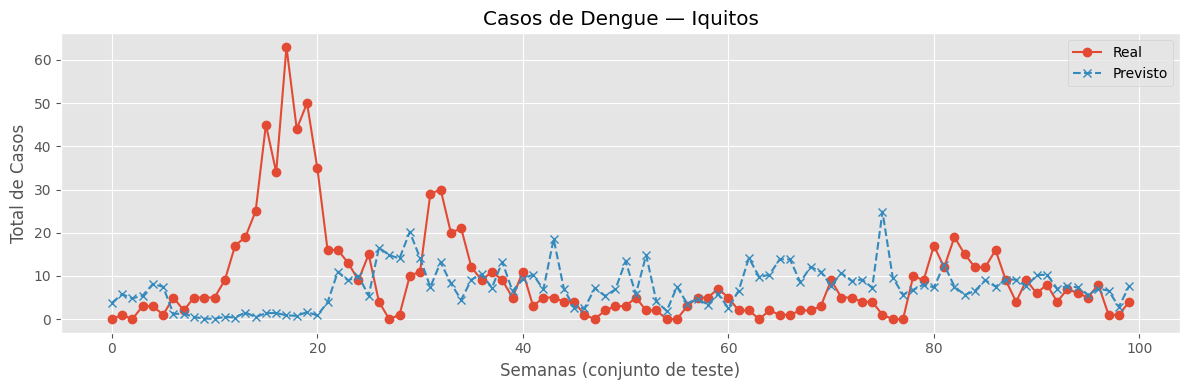

In [ ]:
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_true, y_pred, cidade):
    plt.figure(figsize=(12, 4))
    plt.plot(y_true, label='Real', marker='o', linestyle='-')
    plt.plot(y_pred, label='Previsto', marker='x', linestyle='--')
    plt.title(f'Casos de Dengue — {cidade}')
    plt.xlabel('Semanas (conjunto de teste)')
    plt.ylabel('Total de Casos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot para San Juan
plot_real_vs_pred(y_test_sj, y_pred_sj, 'San Juan')

# Plot para Iquitos
plot_real_vs_pred(y_test_iq, y_pred_iq, 'Iquitos')


In [ ]:
# Pegando os nomes das colunas de estação
season_cols = [col for col in df.columns if col.startswith('season_')]

# Variáveis de San Juan (por exemplo)
features_sj = [
    'station_avg_temp_c_lag6',
    'reanalysis_dew_point_temp_k_lag6',
    'reanalysis_specific_humidity_g_per_kg_lag6',
    'precipitation_amt_mm_lag4',
    'station_precip_mm_lag3',
    'ndvi_mean_lag1',
] + season_cols

# Variáveis de Iquitos (por exemplo)
features_iq = [
    'station_avg_temp_c_lag2',
    'reanalysis_dew_point_temp_k_lag2',
    'reanalysis_specific_humidity_g_per_kg_lag3',
    'precipitation_amt_mm_lag6',
    'station_precip_mm_lag2',
    'ndvi_mean_lag6',
] + season_cols


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset com lags

# Separar por cidade
df_sj = df[df['city'] == 'sj'].dropna(subset=features_sj + ['total_cases']).copy()
df_iq = df[df['city'] == 'iq'].dropna(subset=features_iq + ['total_cases']).copy()

# Função para treinar e avaliar o modelo
def train_and_evaluate(df, features, cidade):
    # Separar treino e teste (80% treino, 20% teste)
    split_index = int(len(df) * 0.8)
    X_train = df[features].iloc[:split_index]
    y_train = df['total_cases'].iloc[:split_index]
    X_test = df[features].iloc[split_index:]
    y_test = df['total_cases'].iloc[split_index:]

    # Modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_norm = mae / y_test.mean()
    rmse_norm = rmse / y_test.mean()

    print(f"\n📊 {cidade.upper()}")
    print(f"MAE: {mae:.2f} (normalizado: {mae_norm:.3f})")
    print(f"RMSE: {rmse:.2f} (normalizado: {rmse_norm:.3f})")

    return y_test.reset_index(drop=True), pd.Series(y_pred)

# Aplicar
y_test_sj, y_pred_sj = train_and_evaluate(df_sj, features_sj, 'San Juan')
y_test_iq, y_pred_iq = train_and_evaluate(df_iq, features_iq, 'Iquitos')



📊 SAN JUAN
MAE: 21.02 (normalizado: 0.831)
RMSE: 28.74 (normalizado: 1.137)

📊 IQUITOS
MAE: 7.88 (normalizado: 0.909)
RMSE: 11.61 (normalizado: 1.338)


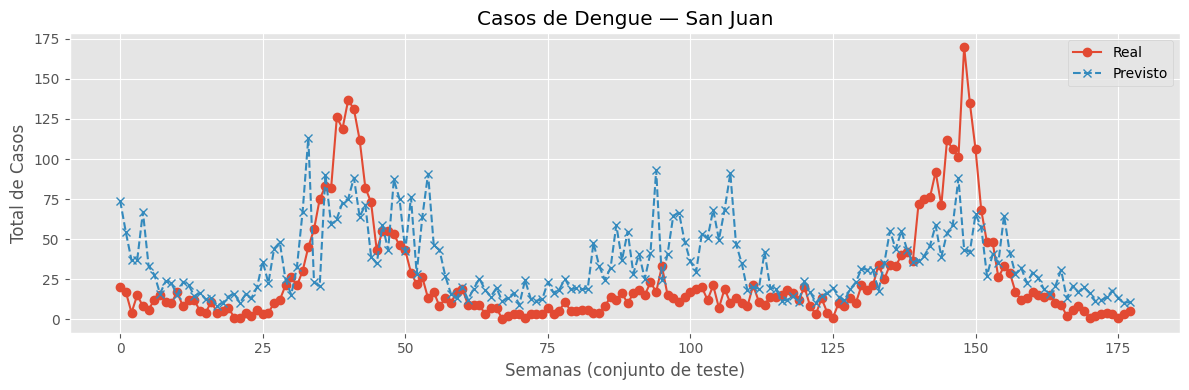

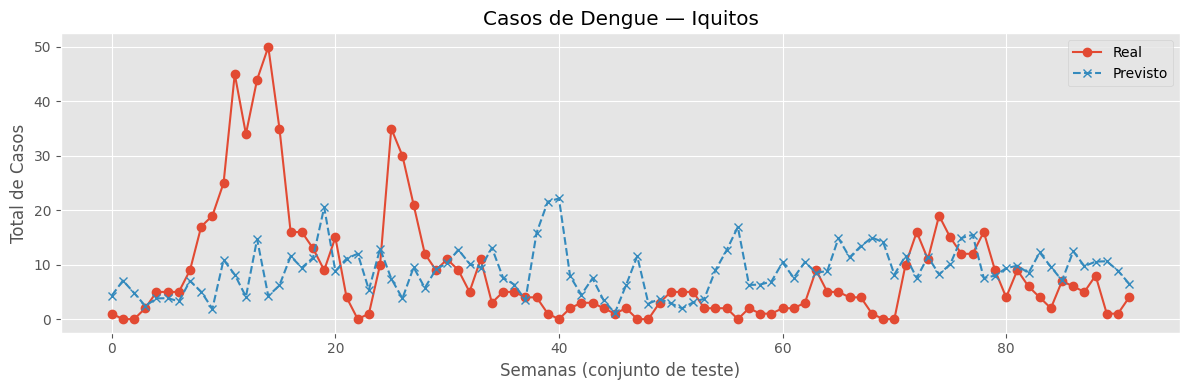

In [ ]:
import matplotlib.pyplot as plt

def plot_real_vs_pred(y_true, y_pred, cidade):
    plt.figure(figsize=(12, 4))
    plt.plot(y_true, label='Real', marker='o', linestyle='-')
    plt.plot(y_pred, label='Previsto', marker='x', linestyle='--')
    plt.title(f'Casos de Dengue — {cidade}')
    plt.xlabel('Semanas (conjunto de teste)')
    plt.ylabel('Total de Casos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot para San Juan
plot_real_vs_pred(y_test_sj, y_pred_sj, 'San Juan')

# Plot para Iquitos
plot_real_vs_pred(y_test_iq, y_pred_iq, 'Iquitos')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# === 1. Carregar os dados ===
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_features_train.csv")
df_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_labels_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dengue/dengue_features_test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dengue/submission_format.csv")

df = df.merge(df_labels, on=['city', 'year', 'weekofyear'])

# === 2. Criar variável season ===
def assign_season(month):
    if month in [12, 1, 2]:
        return "Verão"
    elif month in [3, 4, 5]:
        return "Outono"
    elif month in [6, 7, 8]:
        return "Inverno"
    else:
        return "Primavera"

df['week_start_date'] = pd.to_datetime(df['week_start_date'])
df['season'] = df['week_start_date'].dt.month.map(assign_season)

df_test['week_start_date'] = pd.to_datetime(df_test['week_start_date'])
df_test['season'] = df_test['week_start_date'].dt.month.map(assign_season)

# === 3. Criar dry_days (dias secos consecutivos) ===
def add_dry_days(df):
    df = df.sort_values(['city', 'week_start_date']).copy()
    df['dry'] = df['precipitation_amt_mm'] == 0

    # Criar IDs para blocos consecutivos de "dry" iguais
    dry_blocks = df.groupby('city')['dry'].transform(
        lambda x: (x != x.shift()).cumsum()
    )

    # Contar dias consecutivos secos
    df['dry_days'] = df.groupby(['city', dry_blocks]).cumcount() + 1

    # Zerar onde não é dia seco
    df.loc[~df['dry'], 'dry_days'] = 0

    return df.drop(columns=['dry'])


df = add_dry_days(df)
df_test = add_dry_days(df_test)

# === 4. Gerar lags de 6 semanas ===
def add_lags(df, col_list, lags=[6]):
    df = df.sort_values(['city', 'week_start_date']).copy()
    for col in col_list:
        for lag in lags:
            df[f"{col}_lag{lag}"] = df.groupby('city')[col].shift(lag)
    return df

cols_to_lag = [
    'reanalysis_specific_humidity_g_per_kg',
    'reanalysis_dew_point_temp_k',
    'reanalysis_relative_humidity_percent',
    'station_avg_temp_c',
    'reanalysis_air_temp_k',
    'reanalysis_avg_temp_k'
]

df = add_lags(df, cols_to_lag)
df_test = add_lags(df_test, cols_to_lag)

# === 5. Selecionar features ===
features_sj = [
    'reanalysis_specific_humidity_g_per_kg_lag6',
    'reanalysis_dew_point_temp_k_lag6',
    'reanalysis_relative_humidity_percent_lag6',
    'station_avg_temp_c_lag6',
    'reanalysis_air_temp_k_lag6',
    'reanalysis_avg_temp_k_lag6',
    'dry_days',
    'season'
]

features_iq = [
    'reanalysis_specific_humidity_g_per_kg_lag6',
    'reanalysis_dew_point_temp_k_lag6',
    'reanalysis_air_temp_k_lag6',
    'reanalysis_avg_temp_k_lag6',
    'dry_days',
    'season'
]


def train_and_predict_all(df_train, features, df_pred):
    df_train = df_train.dropna(subset=features + ['total_cases']).copy()
    df_pred = df_pred.copy()

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(df_train[features], df_train['total_cases'])
    y_pred = model.predict(df_pred[features])
    return np.round(y_pred).astype(int)
# === Corrigir 'season' para todos os dataframes ===
estacoes = ['Verão', 'Outono', 'Inverno', 'Primavera']
categoria_estacoes = pd.CategoricalDtype(categories=estacoes, ordered=True)

for d in [df, df_test]:
    if 'season' in d.columns:
        d['season'] = d['season'].astype(categoria_estacoes)
        d['season'] = d['season'].cat.codes

df_pred_sj = df_test[df_test['city'] == 'sj'].copy()
df_pred_iq = df_test[df_test['city'] == 'iq'].copy()

# === 7. Previsões separadas por cidade ===
df_pred_sj = df_test[df_test['city'] == 'sj'].copy()
df_pred_iq = df_test[df_test['city'] == 'iq'].copy()

pred_sj = train_and_predict_all(df[df['city'] == 'sj'], features_sj, df_pred_sj)
pred_iq = train_and_predict_all(df[df['city'] == 'iq'], features_iq, df_pred_iq)

print("Tam submission SJ:", submission[submission.city == 'sj'].shape[0])
print("Tam pred_sj:", len(pred_sj))

print("San Juan - Previsões únicas:", np.unique(pred_sj))
print("Iquitos - Previsões únicas:", np.unique(pred_iq))

# === 8. Gerar CSV de submissão ===
# ✅ Preencher o DataFrame de submissão com as previsões corretas
submission.loc[submission.city == 'sj', 'total_cases'] = pred_sj
submission.loc[submission.city == 'iq', 'total_cases'] = pred_iq

# ✅ Salvar arquivo final
submission.to_csv("submission_final.csv", index=False)
print("✅ Arquivo 'submission_final.csv' salvo com sucesso.")



Tam submission SJ: 260
Tam pred_sj: 260
San Juan - Previsões únicas: [  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  48  49  50  51  53  55  56  57  58  59  60  62  64
  65  66  69  70  71  72  73  75  76  77  78  79  81  82  83  84  85  87
  88  91  93  95 100 101 113 116 117 141 160 171 186 206]
Iquitos - Previsões únicas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 23 33 35]
✅ Arquivo 'submission_final.csv' salvo com sucesso.


# 🦟 DengAI: Predição de Casos de Dengue

Projeto desenvolvido como parte do desafio **DengAI: Predicting Disease Spread**. O objetivo foi prever o número semanal de casos de dengue em duas cidades tropicais — **San Juan (Porto Rico)** e **Iquitos (Peru)** — utilizando dados climáticos, ambientais e temporais.

---

## 📁 Estrutura dos Dados

Fornecidos pela DrivenData, os dados incluem:

- **Características ambientais e climáticas** por semana
- **Número de casos registrados** por cidade
- Informações de NDVI (índice de vegetação), temperatura, precipitação, umidade e mais

As cidades analisadas são:
- 📍 **San Juan (sj)** — Hemisfério Norte
- 📍 **Iquitos (iq)** — Hemisfério Sul

---

## 🔍 Análise Exploratória

Inicialmente, foram inspecionadas as colunas, tipos de dados e valores ausentes. A seguir, iniciamos a exploração visual das variáveis por cidade.

### 🗓️ Sazonalidade
Identificamos estações seca e chuvosa para cada cidade:

- **San Juan:** estação chuvosa de maio a novembro  
- **Iquitos:** estação chuvosa de novembro a abril

📈 _Imagem: boxplot_temperatura_sazonal.png_

---

## 🌿 Engenharia de Variáveis

### 🧪 Variáveis Criadas

- **NDVI médio**: média das quatro direções (NE, NW, SE, SW)
- **Dias secos consecutivos**: dias com precipitação < 1mm
- **Defasagens (lags)**: de 1 a 9 semanas para todas as variáveis ambientais

📈 _Imagem: grafico_ndvi_mensal_iq_sj.png_

📈 _Imagem: grafico_temperatura_movel.png_

📈 _Imagem: heatmap_corr_precipitacao.png_

---

## 🧠 Modelagem

Foi utilizado o modelo **Random Forest Regressor**, com divisão temporal 80/20 para treino e teste.

### 🔧 Seleção de Variáveis

As variáveis foram escolhidas com base na correlação com `total_cases` e na interpretação climatológica. Algumas selecionadas:

#### 📍 San Juan
- `station_avg_temp_c_lag2`
- `station_min_temp_c_lag2`
- `reanalysis_specific_humidity_g_per_kg_lag3`
- `dry_days_lag3` (fraca, mas complementar)

#### 📍 Iquitos
- `station_min_temp_c_lag2`
- `reanalysis_specific_humidity_g_per_kg_lag1`
- `station_precip_mm_lag2`

---

## 📊 Avaliação

| Cidade   | MAE   | MAE Normalizado | RMSE  | RMSE Normalizado |
|----------|-------|------------------|-------|-------------------|
| San Juan | 26.72 | 1.074            | 35.86 | 1.441             |
| Iquitos  | 9.42  | 1.004            | 13.68 | 1.458             |

📈 _Imagem: previsao_temporal_sj.png_  
📈 _Imagem: previsao_temporal_iq.png_

---

## 🧭 Considerações Finais

- Iquitos apresentou melhores resultados com menos variabilidade de casos
- O uso de lags permitiu capturar dinâmicas epidemiológicas relevantes
- A combinação de temperatura e umidade foi particularmente significativa em ambas as cidades
- O modelo ainda apresenta potencial de melhoria, especialmente em San Juan

---

## 📌 Possíveis Extensões

- Testar outros modelos (LSTM, XGBoost)
- Modelar separadamente para cada cidade
- Incluir mais dados externos (mobilidade, campanhas públicas etc.)

---

## 📎 Referência

> Este projeto foi desenvolvido no contexto do [Desafio DengAI](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/), utilizando Python, pandas, seaborn e scikit-learn.
